# Trying to boost a category (concept)

In [120]:
import os
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [121]:
model = keras.models.load_model(os.path.join('models', 'painter_model'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 64)           640000    
                                                                 
 lstm (LSTM)                 (None, 16)                5184      
                                                                 
 dense (Dense)               (None, 8)                 136       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 645,361
Trainable params: 645,361
Non-trai

In [122]:
dirname = "painters_ds"

In [123]:
wdf = pd.read_json('./data/' + dirname + ".json")
wdf.head(3)

,category,input,output
http://dbpedia.org/resource/Alexander_Semionov,[http://dbpedia.org/resource/Russia],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
http://dbpedia.org/resource/Howardena_Pindell,[http://dbpedia.org/resource/United_States],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
http://dbpedia.org/resource/Étienne_Moreau-Nélaton,[http://dbpedia.org/resource/France],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1


In [124]:
dfs = []
for filename in os.listdir(os.path.join('activations', dirname)):
    if filename.split('.')[-1] == 'pkl' and 'table_data' not in filename:
        dfs.append(pd.read_pickle(os.path.join('activations', dirname, filename)))

In [137]:
layer_to_explore = 1
df = dfs[layer_to_explore]
print(f"Using layer {model.layers[layer_to_explore].name}")

Using layer lstm


In [138]:
df.head(1)

,category,input,true,pred,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,...,neuron_55,neuron_56,neuron_57,neuron_58,neuron_59,neuron_60,neuron_61,neuron_62,neuron_63,neuron_64
http://dbpedia.org/resource/Alexander_Semionov,[http://dbpedia.org/resource/Russia],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,1,0.015262,0.024435,0.03541,-0.031234,0.020837,-0.000182,...,0.061672,0.06811,-0.019993,-0.057241,0.033909,-0.067252,0.031596,-0.030866,0.031695,-0.012747


In [139]:
df.iloc[0, 4:]

neuron_1     0.015262
neuron_2     0.024435
neuron_3      0.03541
neuron_4    -0.031234
neuron_5     0.020837
               ...   
neuron_60   -0.067252
neuron_61    0.031596
neuron_62   -0.030866
neuron_63    0.031695
neuron_64   -0.012747
Name: http://dbpedia.org/resource/Alexander_Semionov, Length: 64, dtype: object

In [140]:
def plot_activ(df, df2=None, df3=None):
    
#     plt.figure(figsize=(15, 6))
#     sns.lineplot(x=range(len(df.iloc[0, :])), y=df.iloc[0, :])
#     if df2 is not None:
#         sns.lineplot(x=range(len(df2.iloc[0, :])), y=df2.iloc[0, :])
#     plt.show()
    
#     plt.figure(figsize=(15, 6))
#     sns.scatterplot(x=range(len(df.iloc[0, :])), y=df.iloc[0, :])
#     if df2 is not None:
#         sns.scatterplot(x=range(len(df2.iloc[0, :])), y=df2.iloc[0, :])
#     plt.show()

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle('Visualizing sample vs cat')
    
    sns.lineplot(ax=axes[0], x=range(len(df.iloc[0, :])), y=df.iloc[0, :])
    if df2 is not None:
        sns.lineplot(ax=axes[0], x=range(len(df2.iloc[0, :])), y=df2.iloc[0, :])
    if df3 is not None:
        sns.lineplot(ax=axes[0], x=range(len(df3.iloc[0, :])), y=df3.iloc[0, :])
    axes[0].set_title('Line plot')
    
    
    sns.scatterplot(ax=axes[1], x=range(len(df.iloc[0, :])), y=df.iloc[0, :])
    if df2 is not None:
        sns.scatterplot(ax=axes[1], x=range(len(df2.iloc[0, :])), y=df2.iloc[0, :])
    if df3 is not None:
        sns.scatterplot(ax=axes[1], x=range(len(df3.iloc[0, :])), y=df3.iloc[0, :])
    axes[1].set_title('Scatter plot')
    
    fig.legend(['df1', 'df2', 'df3'])
    
    
def get_cat_df(df, cat):
    return df[df.category.apply(lambda x: cat in x)]

def get_mean_activations(df):
    df_act = df.iloc[:, 4:]
    return df_act.mean()

In [141]:
cat = 'http://dbpedia.org/resource/Russia'

In [142]:
df_cat = get_cat_df(df, cat)
df_mean_cat = get_mean_activations(df_cat)
df_mean_cat = pd.DataFrame(df_mean_cat).T
df_mean_cat

,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,neuron_7,neuron_8,neuron_9,neuron_10,...,neuron_55,neuron_56,neuron_57,neuron_58,neuron_59,neuron_60,neuron_61,neuron_62,neuron_63,neuron_64
0,0.012538,0.023253,0.034245,-0.028996,0.020197,-0.002792,-0.024223,0.034409,-0.018323,-0.033272,...,0.053239,0.061073,-0.017981,-0.050038,0.031612,-0.058789,0.027805,-0.028558,0.025015,-0.010367


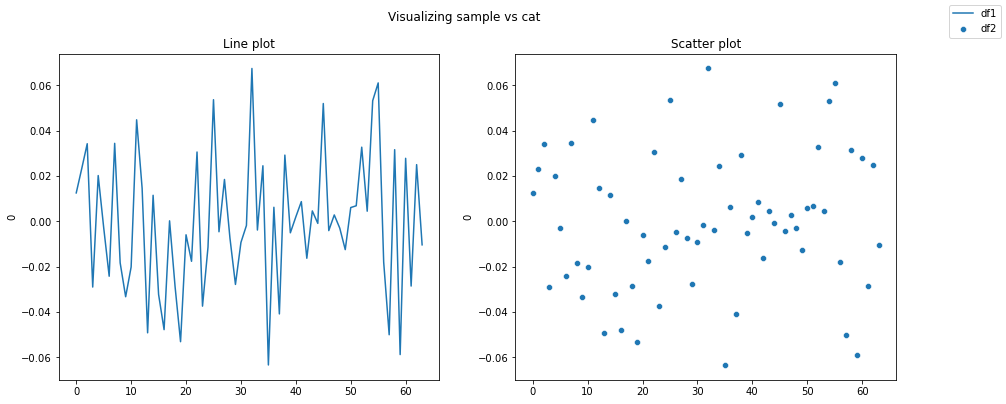

In [143]:
plot_activ(df_mean_cat)

In [144]:
def get_sample(df, cat=None):
    if cat is None:
        return df[df.pred != df.true].sample(n=1)
    else:
        return get_cat_df(df, cat)[df.pred != df.true].sample(n=1)

In [145]:
cat

'http://dbpedia.org/resource/Russia'

In [146]:
sample = get_sample(df, 'http://dbpedia.org/resource/Russia')
sample

C:\Users\maxim\AppData\Local\Temp/ipykernel_11384/370248897.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return get_cat_df(df, cat)[df.pred != df.true].sample(n=1)


,category,input,true,pred,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,...,neuron_55,neuron_56,neuron_57,neuron_58,neuron_59,neuron_60,neuron_61,neuron_62,neuron_63,neuron_64
http://dbpedia.org/resource/Alexei_Pakhomov,[http://dbpedia.org/resource/Russia],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,0,0.013503,0.026159,0.036408,-0.031979,0.023641,-0.003359,...,0.054591,0.065087,-0.018827,-0.050582,0.034035,-0.057909,0.030077,-0.032663,0.025175,-0.009467


In [147]:
activations_cols = [x for x in sample.columns if "neuron" in x]
df_act_sample = sample.loc[:, activations_cols]
df_act_sample

,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,neuron_7,neuron_8,neuron_9,neuron_10,...,neuron_55,neuron_56,neuron_57,neuron_58,neuron_59,neuron_60,neuron_61,neuron_62,neuron_63,neuron_64
http://dbpedia.org/resource/Alexei_Pakhomov,0.013503,0.026159,0.036408,-0.031979,0.023641,-0.003359,-0.026371,0.038428,-0.018691,-0.033438,...,0.054591,0.065087,-0.018827,-0.050582,0.034035,-0.057909,0.030077,-0.032663,0.025175,-0.009467


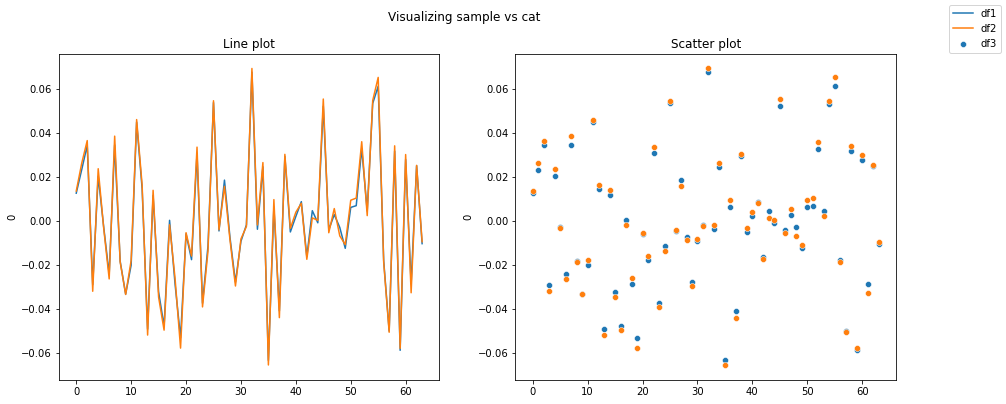

In [148]:
plot_activ(df_mean_cat, df_act_sample)

In [149]:
def get_diffs(df, sample_df):
    return sample_df.reset_index().drop(columns=['index']) - df

In [150]:
diffs = get_diffs(df_mean_cat, df_act_sample)
diffs

,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,neuron_7,neuron_8,neuron_9,neuron_10,...,neuron_55,neuron_56,neuron_57,neuron_58,neuron_59,neuron_60,neuron_61,neuron_62,neuron_63,neuron_64
0,0.000966,0.002907,0.002162,-0.002983,0.003444,-0.000567,-0.002147,0.004019,-0.000368,-0.000166,...,0.001352,0.004015,-0.000845,-0.000544,0.002423,0.00088,0.002271,-0.004105,0.000159,0.000901


In [151]:
avg_diff = abs(diffs).sum().sum()/len(diffs.iloc[0, :])
print(f"Average difference is: {avg_diff}")

Average difference is: 0.0020072157494723797


### Re-adjust activations

On rapproche les activations du sample vers les activations de la catégorie cible d'un facteur 10% sur les neurones dont la différence est significative (i.e. pvalue < 0.01).

On a alors besoin de 3 éléments:
* le dataframe des activations du sample
* le dataframe des activations moyennes de la catégorie cible
* le dataframe des pvalues de la catégorie cible (avec maybe l'information sur la significativité de la pvalue, ici fixée à <= 0.01)

In [152]:
russia_pv = pd.read_pickle('src/russia-pv.pkl')
dfrpv = pd.DataFrame(russia_pv, columns=['pvalue'])
dfrpv

,pvalue
0,1.587716e-01
1,4.878287e-09
2,6.452485e-05
3,1.579483e-06
4,1.897656e-13
...,...
59,4.158541e-02
60,3.111701e-04
61,1.502952e-06
62,9.974529e-02


In [153]:
dfrpv['sign'] = dfrpv['pvalue'] <= 0.01
print(dfrpv[dfrpv['sign'] == True].shape)
print(dfrpv[dfrpv['sign'] == True])

(42, 2)
          pvalue  sign
1   4.878287e-09  True
2   6.452485e-05  True
3   1.579483e-06  True
4   1.897656e-13  True
5   2.738027e-11  True
7   3.096681e-03  True
9   3.773218e-03  True
10  1.769776e-03  True
12  1.351876e-13  True
14  7.951155e-24  True
15  2.011291e-03  True
17  6.368204e-23  True
19  6.570767e-03  True
21  5.796425e-05  True
22  3.067940e-07  True
23  5.675254e-05  True
24  1.612688e-10  True
26  9.286252e-11  True
29  1.690230e-06  True
30  3.268496e-09  True
31  1.080565e-11  True
32  5.932947e-03  True
33  1.684570e-11  True
34  2.491615e-03  True
36  2.208312e-03  True
40  4.088773e-18  True
41  3.012649e-08  True
42  1.058638e-14  True
43  6.252875e-12  True
44  2.203407e-05  True
46  1.785589e-24  True
47  9.985386e-08  True
49  9.544518e-05  True
50  1.910548e-19  True
51  2.097827e-18  True
52  8.469099e-08  True
53  1.930613e-16  True
56  2.021712e-03  True
58  6.567423e-05  True
60  3.111701e-04  True
61  1.502952e-06  True
63  2.292984e-04  True


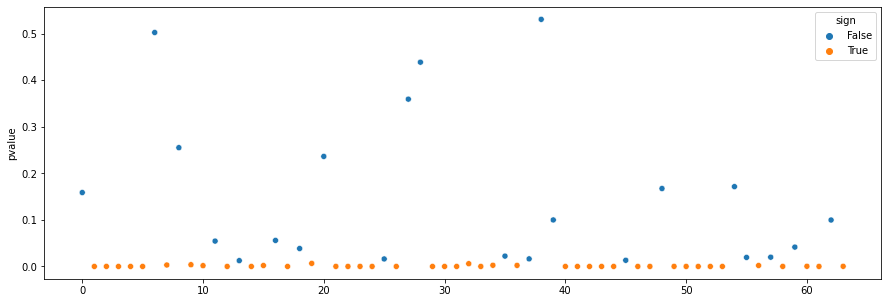

In [154]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x=range(len(dfrpv['pvalue'])), y='pvalue', 
                hue='sign', data=dfrpv)
plt.show()

Pvalue dataframe with significant bool value (example for russia here)

In [155]:
dfrpv

,pvalue,sign
0,1.587716e-01,False
1,4.878287e-09,True
2,6.452485e-05,True
3,1.579483e-06,True
4,1.897656e-13,True
...,...,...
59,4.158541e-02,False
60,3.111701e-04,True
61,1.502952e-06,True
62,9.974529e-02,False


In [156]:
df_mean_cat # mean activations for a category (here russia)

,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,neuron_7,neuron_8,neuron_9,neuron_10,...,neuron_55,neuron_56,neuron_57,neuron_58,neuron_59,neuron_60,neuron_61,neuron_62,neuron_63,neuron_64
0,0.012538,0.023253,0.034245,-0.028996,0.020197,-0.002792,-0.024223,0.034409,-0.018323,-0.033272,...,0.053239,0.061073,-0.017981,-0.050038,0.031612,-0.058789,0.027805,-0.028558,0.025015,-0.010367


In [157]:
df_act_sample # activations for a misclassified sample of the category

,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,neuron_7,neuron_8,neuron_9,neuron_10,...,neuron_55,neuron_56,neuron_57,neuron_58,neuron_59,neuron_60,neuron_61,neuron_62,neuron_63,neuron_64
http://dbpedia.org/resource/Alexei_Pakhomov,0.013503,0.026159,0.036408,-0.031979,0.023641,-0.003359,-0.026371,0.038428,-0.018691,-0.033438,...,0.054591,0.065087,-0.018827,-0.050582,0.034035,-0.057909,0.030077,-0.032663,0.025175,-0.009467


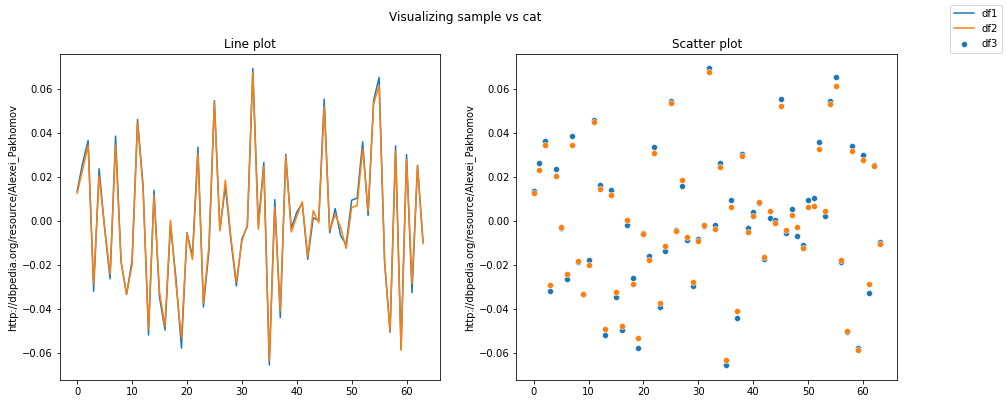

In [158]:
plot_activ(df=df_act_sample, df2=df_mean_cat)
# df in blue
# df2 in orange

In [159]:
dfrpv.set_index(df_act_sample.T.index, inplace=True)
dfrpv

,pvalue,sign
neuron_1,1.587716e-01,False
neuron_2,4.878287e-09,True
neuron_3,6.452485e-05,True
neuron_4,1.579483e-06,True
neuron_5,1.897656e-13,True
...,...,...
neuron_60,4.158541e-02,False
neuron_61,3.111701e-04,True
neuron_62,1.502952e-06,True
neuron_63,9.974529e-02,False


The formula for the new data point is : 

$$ s' = s - d * f $$

where $s'$ is the new value, $s$ is the activation value of the sample, $d$ is the difference between the sample activation and the mean activation (on the same neuron) and $f$ is the factor

In [160]:
def boost(sample, category, pvalue=None):
    """
    both of the 3 elements have the same shape
    pvalues might be reached directly from this function
    """
    
    factor = 0.1 # i.e. 10%
    
    # We built a proper dataset to process the data
    df = pd.concat([sample, category, pvalue]).T
    df.columns = [
        'sample', 'cat', 'pvalue', 'sign'
    ]
    
    df['new_value'] = df['sample']
    
    for i in range(df.shape[0]):
        index = f"neuron_{i+1}"
        if df.loc[index, "sign"] == True:
            df.loc[index, "new_value"] = df.loc[index, 'sample'] - (df.loc[index, 'sample'] - df.loc[index, 'cat']) * factor
    
    return df

In [161]:
dfb = boost(df_act_sample, df_mean_cat, dfrpv.T)
dfb

,sample,cat,pvalue,sign,new_value
neuron_1,0.013503,0.012538,0.158772,False,0.013503
neuron_2,0.026159,0.023253,0.0,True,0.025869
neuron_3,0.036408,0.034245,0.000065,True,0.036191
neuron_4,-0.031979,-0.028996,0.000002,True,-0.031681
neuron_5,0.023641,0.020197,0.0,True,0.023296
...,...,...,...,...,...
neuron_60,-0.057909,-0.058789,0.041585,False,-0.057909
neuron_61,0.030077,0.027805,0.000311,True,0.02985
neuron_62,-0.032663,-0.028558,0.000002,True,-0.032253
neuron_63,0.025175,0.025015,0.099745,False,0.025175


In [162]:
dfb.fillna(value=dfb[dfb['sign'] == False]['new_value'])

,sample,cat,pvalue,sign,new_value
neuron_1,0.013503,0.012538,0.158772,False,0.013503
neuron_2,0.026159,0.023253,0.0,True,0.025869
neuron_3,0.036408,0.034245,0.000065,True,0.036191
neuron_4,-0.031979,-0.028996,0.000002,True,-0.031681
neuron_5,0.023641,0.020197,0.0,True,0.023296
...,...,...,...,...,...
neuron_60,-0.057909,-0.058789,0.041585,False,-0.057909
neuron_61,0.030077,0.027805,0.000311,True,0.02985
neuron_62,-0.032663,-0.028558,0.000002,True,-0.032253
neuron_63,0.025175,0.025015,0.099745,False,0.025175


In [163]:
dfb[dfb['sign'] == False]['sample']

neuron_1     0.013503
neuron_7    -0.026371
neuron_9    -0.018691
neuron_12    0.045947
neuron_14   -0.051858
neuron_17   -0.049625
neuron_19   -0.026127
neuron_21   -0.005404
neuron_26    0.054499
neuron_28     0.01566
neuron_29   -0.008574
neuron_36   -0.065436
neuron_38   -0.043955
neuron_39    0.030168
neuron_40    -0.00343
neuron_46    0.055274
neuron_49   -0.006835
neuron_55    0.054591
neuron_56    0.065087
neuron_58   -0.050582
neuron_60   -0.057909
neuron_63    0.025175
Name: sample, dtype: object

### Display the new visualization

In [164]:
dfb['sample'].values

array([0.013503344729542732, 0.02615916170179844, 0.036407697945833206,
       -0.03197935223579407, 0.023640867322683334, -0.0033585417550057173,
       -0.02637065388262272, 0.03842812776565552, -0.01869094930589199,
       -0.03343786299228668, -0.01799437589943409, 0.045947033911943436,
       0.016278835013508797, -0.05185842141509056, 0.013836126774549484,
       -0.03462604060769081, -0.049624644219875336,
       -0.0018109637312591076, -0.02612651139497757,
       -0.057780977338552475, -0.005404047667980194,
       -0.015986233949661255, 0.033437807112932205, -0.039080746471881866,
       -0.01370942872017622, 0.05449899658560753, -0.0040823183953762054,
       0.015659935772418976, -0.008574340492486954, -0.029590493068099022,
       -0.00823979452252388, -0.0025421008467674255, 0.0691450908780098,
       -0.0018665596144273877, 0.026431169360876083, -0.06543648988008499,
       0.009624114260077477, -0.04395535588264465, 0.030168335884809494,
       -0.0034296023659408092, 0

In [165]:
df_act_sample

,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,neuron_7,neuron_8,neuron_9,neuron_10,...,neuron_55,neuron_56,neuron_57,neuron_58,neuron_59,neuron_60,neuron_61,neuron_62,neuron_63,neuron_64
http://dbpedia.org/resource/Alexei_Pakhomov,0.013503,0.026159,0.036408,-0.031979,0.023641,-0.003359,-0.026371,0.038428,-0.018691,-0.033438,...,0.054591,0.065087,-0.018827,-0.050582,0.034035,-0.057909,0.030077,-0.032663,0.025175,-0.009467


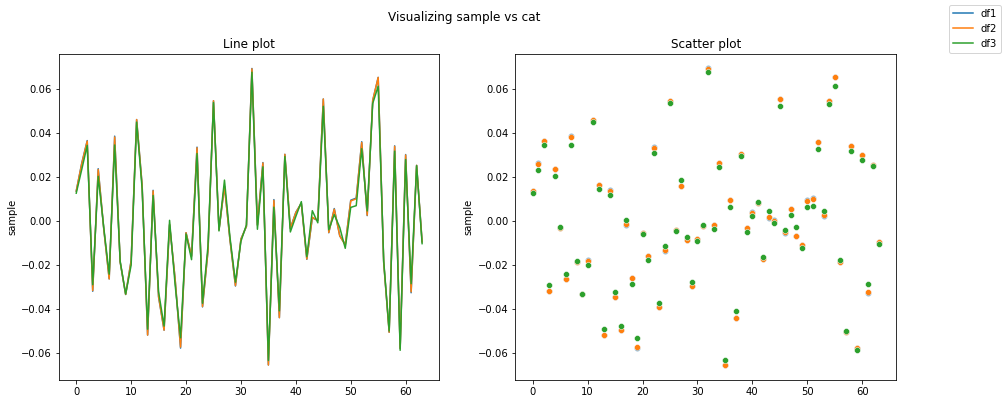

In [166]:
plot_activ(df=pd.DataFrame(dfb['sample']).T, df2=pd.DataFrame(dfb['new_value']).T, df3=pd.DataFrame(dfb['cat']).T)

We see on the visualization above that the second df (i.e. the new value) has became much closer

### Re-build the back of the model and make a prediction

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 64)           640000    
                                                                 
 lstm (LSTM)                 (None, 16)                5184      
                                                                 
 dense (Dense)               (None, 8)                 136       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 645,361
Trainable params: 645,361
Non-trai

Instead of re-building the model as we did to get activations of each layer, we want to build the part after the layer we are getting closer the activations of.

Thus, new computed activations become the inputs for the rest of the model.

In [104]:
rest_model = Sequential()
for i in range(layer_to_explore + 1, len(model.layers)):
    rest_model.add(model.layers[i])

rest_model.build(input_shape=model.layers[0].output_shape) #input_shape
rest_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 16)                5184      
                                                                 
 dense (Dense)               (None, 8)                 136       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 5,361
Trainable params: 5,361
Non-trainable params: 0
_________________________________________________________________


In [105]:
new_activations = dfb['new_value']
new_activations

neuron_1     0.319104
neuron_2     0.483469
neuron_3     0.171305
neuron_4    -0.095403
neuron_5     0.256569
               ...   
neuron_60   -0.432819
neuron_61    0.330167
neuron_62   -0.356754
neuron_63    0.562353
neuron_64   -0.559289
Name: new_value, Length: 64, dtype: object

In [118]:
nas = np.asarray(new_activations).astype('float32').reshape(-1, 64).reshape(-1, 1, 64)
nas

array([[[ 0.3191042 ,  0.48346886,  0.17130527, -0.09540334,
          0.2565691 ,  0.46701437, -0.7892057 ,  0.3697217 ,
         -0.60710084, -0.4956614 , -0.4205321 ,  0.43154657,
         -0.0178893 , -0.5320075 , -0.3448396 , -0.2644118 ,
         -0.3926907 ,  0.5268508 , -0.42088413, -0.4024242 ,
         -0.15854473, -0.75803125,  0.45784134, -0.3139935 ,
         -0.34587526,  0.46112207, -0.38903567,  0.569992  ,
         -0.67268384, -0.4049564 , -0.3242009 , -0.05849189,
          0.4021815 , -0.36254814,  0.34195223, -0.4982025 ,
          0.51734036, -0.6015957 ,  0.5759289 , -0.12711647,
         -0.5751509 ,  0.43235058, -0.1663268 ,  0.083271  ,
         -0.5343284 ,  0.400274  ,  0.38376224, -0.23546217,
         -0.88381714, -0.6885339 , -0.6532038 , -0.00237176,
          0.39422157,  0.70567244,  0.60506386,  0.4454974 ,
         -0.712941  , -0.4970965 ,  0.3536418 , -0.4328194 ,
          0.3301674 , -0.35675424,  0.56235296, -0.5592886 ]]],
      dtype=float32)

In [119]:
rest_model.predict(nas)

1/1 [==============================] - 2s 2s/step


array([[0.3591593]], dtype=float32)

### Testing with original model

In [114]:
inputs = np.array([np.array(x) for x in wdf[wdf.index == sample.index[0]].input])
inputs

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
         262,  465,  379, 4604, 2048,   39,   24,  102,    3,    5, 2189,
          58,    9,   59,    3,   16, 

In [111]:
# Re-creating a model
nm = Sequential()
nm.add(model.layers[0])
nm.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 64)           640000    
                                                                 
Total params: 640,000
Trainable params: 640,000
Non-trainable params: 0
_________________________________________________________________


In [112]:
# Predicting according to this new created model
na = nm.predict(inputs)
na.shape

1/1 [==============================] - 0s 98ms/step


(1, 150, 64)

In [83]:
# recompose the "back" of the model
bm = Sequential()
for i in range(1, len(model.layers)):
    bm.add(model.layers[i])

In [84]:
# and then re-predict
bm.predict(na)

1/1 [==============================] - 0s 444ms/step


array([[0.10533872]], dtype=float32)

In [85]:
new_activations

neuron_1     0.319104
neuron_2     0.483469
neuron_3     0.171305
neuron_4    -0.095403
neuron_5     0.256569
               ...   
neuron_60   -0.432819
neuron_61    0.330167
neuron_62   -0.356754
neuron_63    0.562353
neuron_64   -0.559289
Name: new_value, Length: 64, dtype: object

In [94]:
nas = np.array(np.asarray(new_activations.values)).astype('float32')
len(nas)

64

In [95]:
len(na[0][0])

64

In [63]:
bm.predict(new_activations)

ValueError: in user code:

    File "D:\users\maxim\anaconda3\envs\rnn-films\lib\site-packages\keras\engine\training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "D:\users\maxim\anaconda3\envs\rnn-films\lib\site-packages\keras\engine\training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\users\maxim\anaconda3\envs\rnn-films\lib\site-packages\keras\engine\training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "D:\users\maxim\anaconda3\envs\rnn-films\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
        return self(x, training=False)
    File "D:\users\maxim\anaconda3\envs\rnn-films\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None

    ValueError: Exception encountered when calling layer "sequential_2" (type Sequential).
    
    Cannot iterate over a shape with unknown rank.
    
    Call arguments received by layer "sequential_2" (type Sequential):
      • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
      • training=False
      • mask=None
